In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("insurance_pred/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Check for missing values

In [3]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No missing data

# Exploratory Data Analysis

In [4]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [5]:
df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [6]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Target Variable (Response)

<Axes: xlabel='Response', ylabel='count'>

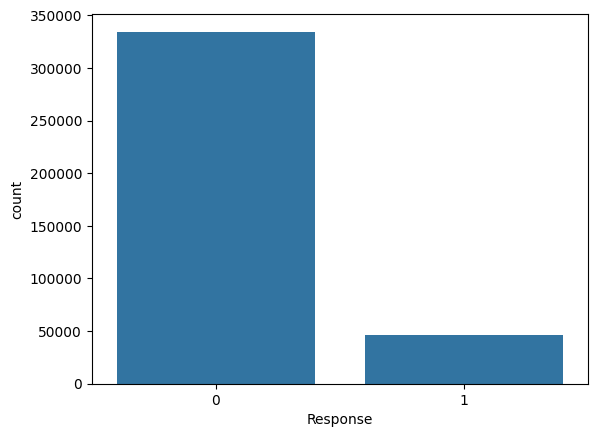

In [7]:
sns.countplot(data = df, x='Response' )

In [8]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

# Age Distribution of Customers

<Axes: xlabel='Age', ylabel='Density'>

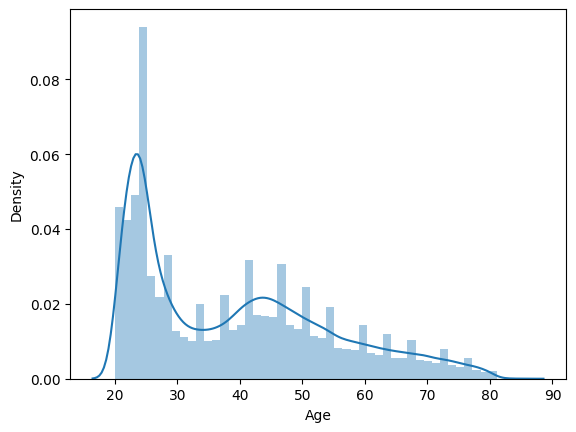

In [9]:
sns.distplot(df.Age)

# Age Vs Annual premium

<Axes: xlabel='Age', ylabel='Annual_Premium'>

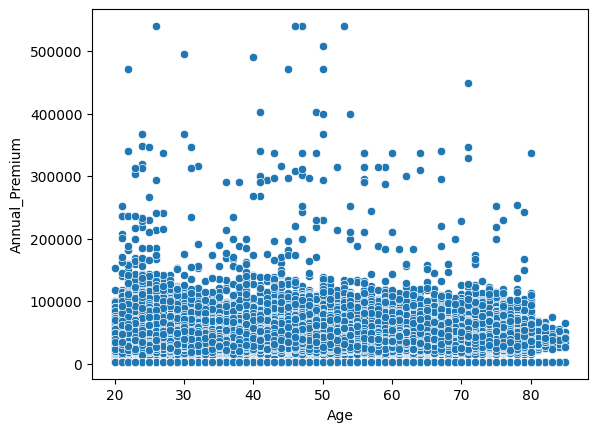

In [10]:
sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

# Gender and Response

<Axes: xlabel='Gender', ylabel='count'>

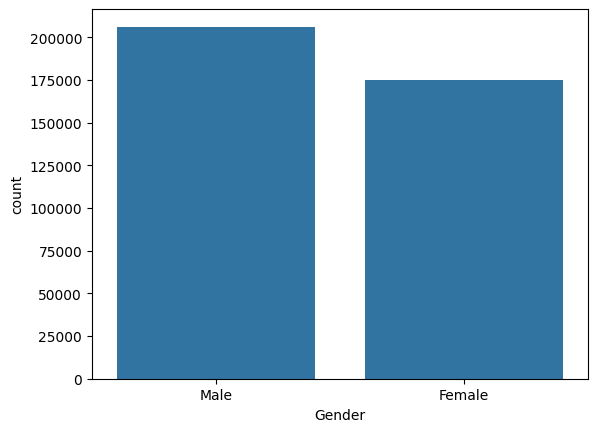

In [11]:
sns.countplot(data = df, x='Gender')

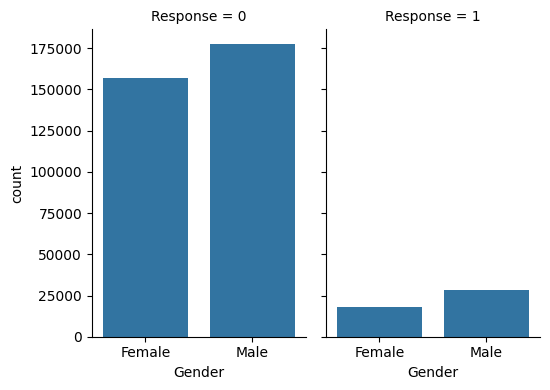

In [12]:
df1=df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response",
                data=df1, kind="bar",
                height=4, aspect=.7);

# Vehicle Age

<Axes: xlabel='Vehicle_Age', ylabel='count'>

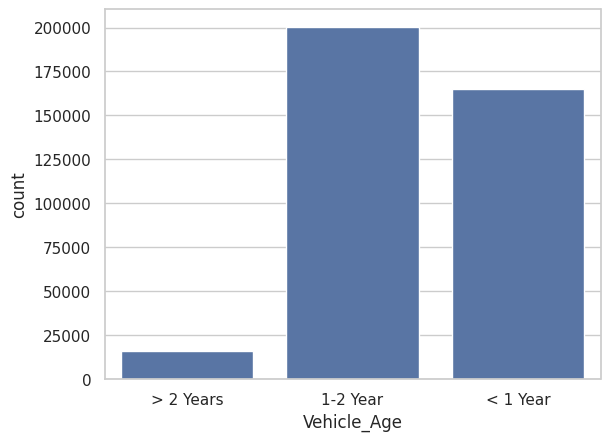

In [13]:
sns.set(style='whitegrid')
sns.countplot(data = df ,x='Vehicle_Age')

### Feature Engineering

In [14]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})


In [15]:
df.Vehicle_Age.unique()
df['Vehicle_Age'] = df['Vehicle_Age'].map({'> 2 Years': 1, '1-2 Year': 2, '< 1 Year': 3})


In [16]:
df.Vehicle_Damage.unique()
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 2})


In [17]:
# y data
y = df["Response"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [18]:
X = df.drop('Response', axis=1,inplace=True)
X = df.drop("id", axis=1,inplace=False)
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,1,1,40454.0,26.0,217
1,1,76,1,3.0,0,2,2,33536.0,26.0,183
2,1,47,1,28.0,0,1,1,38294.0,26.0,27
3,1,21,1,11.0,1,3,2,28619.0,152.0,203
4,2,29,1,41.0,1,3,2,27496.0,152.0,39


In [19]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,1,1,40454.0,26.0,217
1,1,76,1,3.0,0,2,2,33536.0,26.0,183
2,1,47,1,28.0,0,1,1,38294.0,26.0,27
3,1,21,1,11.0,1,3,2,28619.0,152.0,203
4,2,29,1,41.0,1,3,2,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,2,2,30170.0,26.0,88
381105,1,30,1,37.0,1,3,2,40016.0,152.0,131
381106,1,21,1,30.0,1,3,2,35118.0,160.0,161
381107,2,68,1,14.0,0,1,1,44617.0,124.0,74


### Training Model

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

In [21]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
45748,2,22,1,24.0,1,3,2,2630.0,152.0,68
150378,1,22,1,46.0,1,3,2,29544.0,152.0,202
27587,2,61,1,50.0,0,2,1,34217.0,124.0,122
282194,2,29,1,32.0,1,3,1,33889.0,152.0,131
45560,1,23,1,25.0,0,3,1,21758.0,152.0,144
...,...,...,...,...,...,...,...,...,...,...
73349,2,27,1,11.0,1,3,2,26584.0,152.0,295
371403,2,39,1,41.0,0,2,1,27136.0,156.0,233
312201,1,45,1,28.0,1,2,2,33735.0,124.0,120
267336,2,43,1,36.0,1,2,2,35142.0,152.0,108


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train = scaler.fit_transform(X_train)
df_val = scaler.transform(X_val)
df_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
LogisticRegressionScore = lr.score(X_val, y_val)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 87.41373881556505


In [25]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 87.49106223309695


In [26]:
LogisticRegressionScore = lr.score(X_train, y_train)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 87.45240039752433


### Saving the model

In [27]:
import pickle

In [28]:
c = 1.0

In [29]:
output_file = 'model_C=%s.bin' % c

In [30]:
output_file

'model_C=1.0.bin'

In [31]:
f_out = open(output_file, 'wb')
pickle.dump((scaler,lr), f_out)
f_out.close()

In [32]:
with open(output_file, 'wb') as f_out:
    pickle.dump((scaler,lr), f_out)

### Loading the model

In [33]:
import pickle
import numpy as np
import pandas as pd

In [34]:
model_file = 'model_C=1.0.bin'

In [35]:
with open(model_file, 'rb') as f_in:
   scaler, model = pickle.load(f_in)

In [36]:
scaler, model

(StandardScaler(), LogisticRegression())

In [37]:
    #patient = np.array(X_test.iloc[0])
    #patient = patient.reshape(1, -1)
#[1].to_dict()
# patient = [[1.28938e+05, 1.00000e+00, 3.50000e+01, 1.00000e+00, 4.70000e+01,
#         0.00000e+00, 2.00000e+00, 1.00000e+00, 3.07980e+04, 1.52000e+02,
#         2.38000e+02]]
patient_dict ={
'Gender': 1.0,
 'Age': 35.0,
 'Driving_License': 1.0,
 'Region_Code': 47.0,
 'Previously_Insured': 0.0,
 'Vehicle_Age': 2.0,
 'Vehicle_Damage': 1.0,
 'Annual_Premium': 30798.0,
 'Policy_Sales_Channel': 152.0,
 'Vintage': 238.0}

# {'Gender': 2.0,
#  'Age': 22.0,
#  'Driving_License': 1.0,
#  'Region_Code': 24.0,
#  'Previously_Insured': 1.0,
#  'Vehicle_Age': 3.0,
#  'Vehicle_Damage': 2.0,
#  'Annual_Premium': 2630.0,
#  'Policy_Sales_Channel': 152.0,
#  'Vintage': 68.0}

patient = pd.DataFrame.from_records(patient_dict, index=[0])

In [38]:
columns=['Gender','Age','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 
         'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
patient = patient[columns]

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
xyz = scaler.transform(patient)

In [41]:
abc =model.predict(xyz)
abc[0]

1

In [42]:
# Hi here I was just trying to extract some data from the test dataset so that I can later use it for testing, so ignore this.
# X_test.iloc[0].to_dict()

In [43]:
"""
patient ={'id': 128938.0,
 'Gender': 1.0,
 'Age': 35.0,
 'Driving_License': 1.0,
 'Region_Code': 47.0,
 'Previously_Insured': 0.0,
 'Vehicle_Age': 2.0,
 'Vehicle_Damage': 1.0,
 'Annual_Premium': 30798.0,
 'Policy_Sales_Channel': 152.0,
 'Vintage': 238.0}
 """
# This is the data which I extracted and will be used for future test

"\npatient ={'id': 128938.0,\n 'Gender': 1.0,\n 'Age': 35.0,\n 'Driving_License': 1.0,\n 'Region_Code': 47.0,\n 'Previously_Insured': 0.0,\n 'Vehicle_Age': 2.0,\n 'Vehicle_Damage': 1.0,\n 'Annual_Premium': 30798.0,\n 'Policy_Sales_Channel': 152.0,\n 'Vintage': 238.0}\n "